In [8]:
import pandas as pd
import seaborn as sns

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
penguins = sns.load_dataset("penguins")

In [17]:
penguins = penguins.dropna()

In [18]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [32]:
penguin_train, penguin_test = train_test_split(penguins, test_size=0.3, stratify=penguins['sex'], random_state=42)
print(penguin_train.shape, penguin_test.shape)

(233, 7) (100, 7)


In [35]:
features= ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(penguin_train[features], penguin_train['sex'])

DecisionTreeClassifier(max_depth=3)

In [36]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

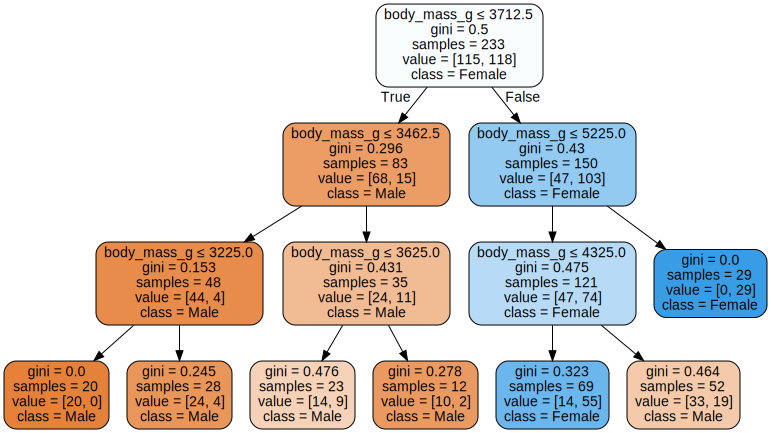

In [37]:
plot_tree_classification(dt, features, penguins.sex.unique())

Aangezien all de gini redelijk laag zijn, zal de accuracy van test en train set waarschijnlijk boven de 70% liggen

In [38]:
predictions = dt.predict(penguins[features])

In [39]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [40]:
predictionsOnTrainset = dt.predict(penguin_train[features])
predictionsOnTestset = dt.predict(penguin_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguin_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguin_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7939914163090128
Accuracy on test set 0.75


The accuracy is actually 75%. Dit is hoger dan de 70% die ik verwachte. Dit betekent dat body mass een redelijke indicatie is van het geslacht van de pinguin.